In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import random
import shutil             # to copy images to another directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

from tqdm import tqdm
from keras.layers import Conv2D, MaxPooling2D , BatchNormalization ,Dropout ,Flatten , Dense , Input , Rescaling , Resizing
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

plt.style.use('ggplot')

In [55]:
import kagglehub

# Download latest version
dataDir = kagglehub.dataset_download("akshat103/e-waste-image-dataset")

print("Path to dataset files:", dataDir)

Using Colab cache for faster access to the 'e-waste-image-dataset' dataset.
Path to dataset files: /kaggle/input/e-waste-image-dataset


In [56]:
train_dir = os.path.join(dataDir, 'train')
test_dir= os.path.join(dataDir,'test')
val_dir = os.path.join(dataDir, 'val')


In [28]:
print(train_dir)

/kaggle/input/e-waste-image-dataset/train


In [29]:
print(test_dir)

/kaggle/input/e-waste-image-dataset/test


In [30]:
print(val_dir)

/kaggle/input/e-waste-image-dataset/val


In [34]:
print("\nContents of main directory:")
for item in os.listdir(dataDir):
    item_path = os.path.join(dataDir, item)
    if os.path.isdir(item_path):
        print(f"📁 Directory: {item}")



Contents of main directory:
📁 Directory: modified-dataset


In [99]:
selectedClasses = ['PCB', 'Television', 'Microwave', 'Mouse', 'Battery', 'Washing Machine', 'Mobile', 'Keyboard', 'Player', 'Printer']

In [100]:
for cls in selectedClasses:
    class_dir = os.path.join(train_dir, cls)
    print(class_dir)

/kaggle/input/e-waste-image-dataset/modified-dataset/train/PCB
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Television
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Microwave
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Mouse
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Battery
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Washing Machine
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Mobile
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Keyboard
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Player
/kaggle/input/e-waste-image-dataset/modified-dataset/train/Printer


In [101]:
# First, check if the main directory exists
print(f"Data directory exists: {os.path.exists(dataDir)}")
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Contents of train directory: {os.listdir(train_dir)}")

Data directory exists: True
Train directory exists: True
Contents of train directory: ['PCB', 'Television', 'Microwave', 'Mouse', 'Battery', 'Washing Machine', 'Mobile', 'Keyboard', 'Player', 'Printer']


In [102]:
dataDir = "/kaggle/input/e-waste-image-dataset"
for roots, dirs, files in os.walk(dataDir):
  print(roots)
  print(dirs)
  print(files)

/kaggle/input/e-waste-image-dataset
['modified-dataset']
[]
/kaggle/input/e-waste-image-dataset/modified-dataset
['val', 'test', 'train']
[]
/kaggle/input/e-waste-image-dataset/modified-dataset/val
['PCB', 'Television', 'Microwave', 'Mouse', 'Battery', 'Washing Machine', 'Mobile', 'Keyboard', 'Player', 'Printer']
[]
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB
[]
['pcb_169.jpg', 'pcb_280.jpg', 'pcb_224.jpg', 'pcb_65.jpg', 'pcb_198.jpg', 'pcb_23.jpg', 'pcb_229.jpg', 'pcb_99.jpg', 'pcb_34.jpg', 'pcb_286.jpg', 'pcb_108.jpg', 'pcb_247.jpg', 'pcb_189.jpg', 'pcb_103.jpg', 'pcb_37.jpg', 'pcb_95.jpg', 'pcb_88.jpg', 'pcb_239.jpg', 'pcb_226.jpg', 'pcb_66.jpg', 'pcb_122.jpg', 'pcb_130.jpg', 'pcb_277.jpg', 'pcb_265.jpg', 'pcb_118.jpg', 'pcb_150.jpg', 'pcb_105.jpg', 'pcb_129.jpg', 'pcb_147.jpg', 'pcb_146.jpg']
/kaggle/input/e-waste-image-dataset/modified-dataset/val/Television
[]
['Television_99.jpg', 'Television_103.jpg', 'Television_129.jpg', 'Television_277.jpg', 'Television_169.

In [103]:
import os

# First, let's see what's actually in the data directory
dataDir = "/kaggle/input/e-waste-image-dataset"
print(f"Contents of data directory: {os.listdir(dataDir)}")

# Let's explore the structure recursively
for root, dirs, files in os.walk(dataDir):
    level = root.replace(dataDir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show only first 5 files to avoid clutter
        print(f"{subindent}{file}")
    if len(files) > 5:
        print(f"{subindent}... and {len(files) - 5} more files")

Contents of data directory: ['modified-dataset']
e-waste-image-dataset/
  modified-dataset/
    val/
      PCB/
        pcb_169.jpg
        pcb_280.jpg
        pcb_224.jpg
        pcb_65.jpg
        pcb_198.jpg
        ... and 25 more files
      Television/
        Television_99.jpg
        Television_103.jpg
        Television_129.jpg
        Television_277.jpg
        Television_169.jpg
        ... and 25 more files
      Microwave/
        Microwave_247.jpg
        Microwave_150.jpg
        Microwave_66.jpg
        Microwave_277.jpg
        Microwave_118.jpg
        ... and 25 more files
      Mouse/
        Mouse_147.jpg
        Mouse_23.jpg
        Mouse_88.jpg
        Mouse_108.jpg
        Mouse_65.jpg
        ... and 25 more files
      Battery/
        battery_265.jpg
        battery_286.jpg
        battery_169.jpg
        battery_37.jpg
        battery_280.jpg
        ... and 25 more files
      Washing Machine/
        Washing_Machine_118.jpg
        Washing_Machine_65.jpg
 

In [104]:
import os
import pandas as pd

def load_images(data_dir, classes):
    """
    Load images from directory structure
    """
    images = []
    labels = []

    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        if os.path.exists(class_dir):
            for img_name in os.listdir(class_dir):  # Use os.listdir() here
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_dir, img_name)
                    images.append(img_path)
                    labels.append(class_name)
        else:
            print(f"Warning: Directory {class_dir} does not exist")

    return images, labels

# Update your directory paths
dataDir = "/kaggle/input/e-waste-image-dataset/modified-dataset"
train_dir = os.path.join(dataDir, "train")
val_dir = os.path.join(dataDir, "val")
test_dir = os.path.join(dataDir, "test")

# Your selected classes (update these based on what you want to use)
selectedClasses = ['PCB', 'Television', 'Microwave', 'Mouse', 'Battery',
                   'Washing Machine', 'Mobile', 'Keyboard', 'Player', 'Printer']

# Use the function to load images
# Load each dataset separately
train_paths, train_labels = load_images(train_dir, selectedClasses)
val_paths, val_labels = load_images(val_dir, selectedClasses)
test_paths, test_labels = load_images(test_dir, selectedClasses)

# Merge them
imgPaths = train_paths + val_paths + test_paths
labels = train_labels + val_labels + test_labels

# Convert the 2 lists to dataframe for easy use
df = pd.DataFrame({
    'imgPath': imgPaths,
    'label': labels
})

df = df.sample(frac=1).reset_index(drop=True)  # Shuffle

print(f"Created dataframe with {len(df)} images")
print(f"Classes found: {df['label'].unique()}")
print(f"Class distribution:\n{df['label'].value_counts()}")
print("\nFirst few rows:")
print(df.head())

Created dataframe with 3000 images
Classes found: ['Battery' 'Player' 'Mouse' 'Microwave' 'Television' 'PCB' 'Mobile'
 'Keyboard' 'Printer' 'Washing Machine']
Class distribution:
label
Battery            300
Player             300
Mouse              300
Microwave          300
Television         300
PCB                300
Mobile             300
Keyboard           300
Printer            300
Washing Machine    300
Name: count, dtype: int64

First few rows:
                                             imgPath    label
0  /kaggle/input/e-waste-image-dataset/modified-d...  Battery
1  /kaggle/input/e-waste-image-dataset/modified-d...   Player
2  /kaggle/input/e-waste-image-dataset/modified-d...    Mouse
3  /kaggle/input/e-waste-image-dataset/modified-d...   Player
4  /kaggle/input/e-waste-image-dataset/modified-d...   Player


In [105]:
# get the ratio such as 15% of each class for testing
def DataFrameSpliting(df , ratio , classesList):

    trainDf = pd.DataFrame(columns = ['imgPath','label'])
    testDf = pd.DataFrame(columns = ['imgPath','label'])
    for clas in classesList :
        tempDf = df[df['label'] == clas]
        lastIndex = int(len(tempDf) * ratio)
        trainClassDf = tempDf[:lastIndex]
        testClassDf = tempDf[lastIndex:]
        trainDf = pd.concat([trainDf , trainClassDf] , axis=0)
        testDf = pd.concat([testDf , testClassDf] , axis=0)

    return trainDf.sample(frac=1).reset_index(drop=True) , testDf.sample(frac=1).reset_index(drop=True)  # shuffling , reset index

In [106]:
classList = list(df['label'].unique())
trainDf , testDf = DataFrameSpliting(df , 0.95 , classList)

In [107]:
trainDf['label'].value_counts()

label
Player             285
Mobile             285
Printer            285
Mouse              285
Battery            285
Television         285
Microwave          285
Keyboard           285
PCB                285
Washing Machine    285
Name: count, dtype: int64

In [108]:
trainDf

imgPath      label
0     /kaggle/input/e-waste-image-dataset/modified-d...     Player
1     /kaggle/input/e-waste-image-dataset/modified-d...     Mobile
2     /kaggle/input/e-waste-image-dataset/modified-d...    Printer
3     /kaggle/input/e-waste-image-dataset/modified-d...      Mouse
4     /kaggle/input/e-waste-image-dataset/modified-d...      Mouse
...                                                 ...        ...
2845  /kaggle/input/e-waste-image-dataset/modified-d...    Battery
2846  /kaggle/input/e-waste-image-dataset/modified-d...     Mobile
2847  /kaggle/input/e-waste-image-dataset/modified-d...   Keyboard
2848  /kaggle/input/e-waste-image-dataset/modified-d...        PCB
2849  /kaggle/input/e-waste-image-dataset/modified-d...  Microwave

[2850 rows x 2 columns]

In [109]:
testDf

imgPath            label
0    /kaggle/input/e-waste-image-dataset/modified-d...           Mobile
1    /kaggle/input/e-waste-image-dataset/modified-d...         Keyboard
2    /kaggle/input/e-waste-image-dataset/modified-d...           Player
3    /kaggle/input/e-waste-image-dataset/modified-d...       Television
4    /kaggle/input/e-waste-image-dataset/modified-d...          Battery
..                                                 ...              ...
145  /kaggle/input/e-waste-image-dataset/modified-d...              PCB
146  /kaggle/input/e-waste-image-dataset/modified-d...              PCB
147  /kaggle/input/e-waste-image-dataset/modified-d...           Player
148  /kaggle/input/e-waste-image-dataset/modified-d...  Washing Machine
149  /kaggle/input/e-waste-image-dataset/modified-d...  Washing Machine

[150 rows x 2 columns]

In [110]:
testDf['label'].value_counts()

label
Mobile             15
Keyboard           15
Player             15
Television         15
Battery            15
Printer            15
PCB                15
Washing Machine    15
Mouse              15
Microwave          15
Name: count, dtype: int64

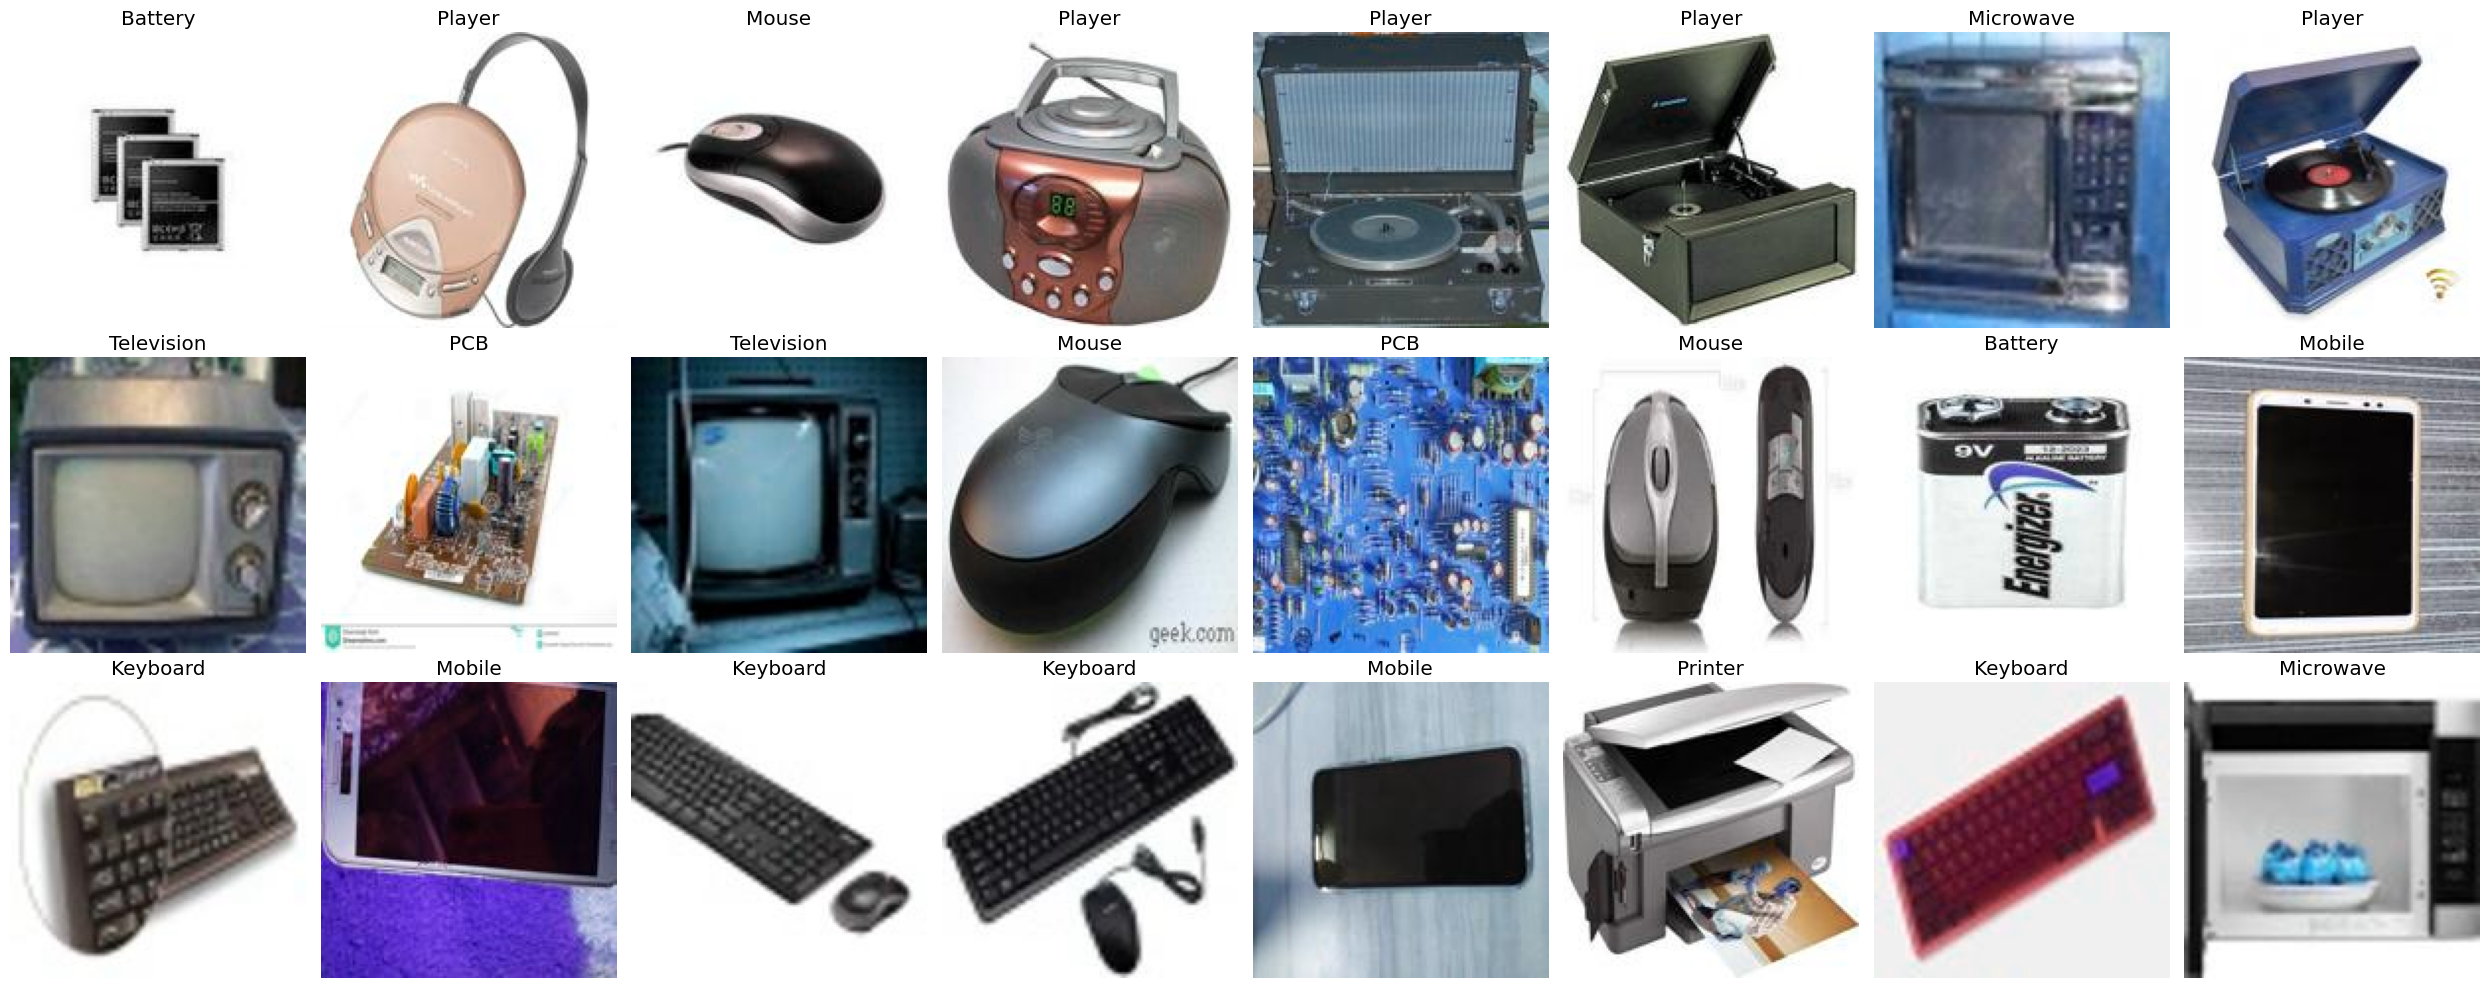

In [111]:
imgPaths = df['imgPath']
fig, axs = plt.subplots(3, 8, figsize=(25, 10))

axs = axs.flatten()

for ax,imgPath in zip(axs , imgPaths):
    label = str(imgPath).split('/')[-2]    # extract label of an imgae from a path
    img = cv2.imread(imgPath)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [112]:
datagenTrain = ImageDataGenerator(
            rescale=1./255,
            zoom_range=(1.0, 1.2),   # zoom in
            horizontal_flip=True,
            vertical_flip=True,
            rotation_range=45,
)

In [115]:
IMG_SIZE = (224,224)

trainGenerator = datagenTrain.flow_from_dataframe(
    trainDf ,
    x_col='imgPath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=64 ,                    # Generate 64 image from the datagenTrain (flipped , rotated , zoomed , ....)  at once
    class_mode='categorical'
)


datagenTest = ImageDataGenerator( rescale=1./255 )

testGenerator = datagenTest.flow_from_dataframe(
    testDf ,
    x_col='imgPath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=8 ,
    class_mode='categorical',
    shuffle=False
)


print(f"Training set size: {trainGenerator.samples}")
print(f"Testing set size: {testGenerator.samples}")

Found 2850 validated image filenames belonging to 10 classes.
Found 150 validated image filenames belonging to 10 classes.
Training set size: 2850
Testing set size: 150


In [116]:
with tf.device('/GPU:0'):          # to use GPU
    Model = Sequential([

#         Resizing(IMG_SIZE),

#         Rescaling(1./255),     These two steps ,we did perform them above with test and image generator

        MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)),

        Flatten(),                                     # because we ignore the flatten and dense layers when include_top = False

        Dense(64,activation='relu'),

        BatchNormalization(),

        Dropout(0.08),

        Dense(10 ,activation='softmax')
    ])

In [120]:
preTrainedModel = Model.layers[0]
for layer in preTrainedModel.layers[:-4]:           # freez all layers except the first and last 3 layers, we will make them trainable (weghts changes with training)
    layer.trainable = False

In [121]:
Model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [122]:
history = Model.fit(trainGenerator,
                    validation_data = testGenerator,
                    epochs=10,
#                     batch_size=64,   # we define it above inside trainGenerator
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                                       patience=4,
                                       monitor='val_accuracy',
                                       restore_best_weights=True)])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.6922 - loss: 0.9897 - val_accuracy: 0.8533 - val_loss: 0.5607
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.8946 - loss: 0.3210 - val_accuracy: 0.9067 - val_loss: 0.3226
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.9200 - loss: 0.2432 - val_accuracy: 0.9267 - val_loss: 0.2532
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.9505 - loss: 0.1714 - val_accuracy: 0.9400 - val_loss: 0.2083
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.9516 - loss: 0.1737 - val_accuracy: 0.9333 - val_loss: 0.1867
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.9631 - loss: 0.1222 - val_accuracy: 0.9467 - val_loss: 0.1865
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.9732 - loss: 0.1013 - val_accuracy: 0.9200 - val_loss: 0.2309
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9728 - loss: 0.0923 - val_accuracy: 0.9067 - v

In [123]:
Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,128,480 (57.71 MB)

 Trainable params: 4,427,722 (16.89 MB)

 Non-trainable params: 1,845,312 (7.04 MB)

 Optimizer params: 8,855,446 (33.78 MB)

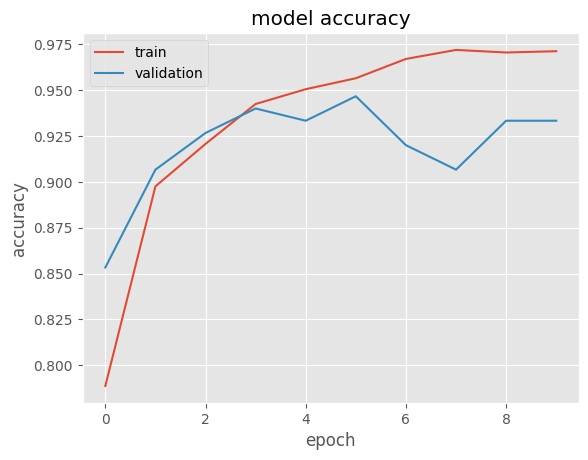

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [125]:
predictions = Model.predict(testGenerator)

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step


In [126]:
images = []
predictedClasses = []
trueClasses = []


class_labels = list(testGenerator.class_indices.keys())

for i in range(len(testGenerator)):
    img_batch, true_labels_batch = next(testGenerator)  # Get next batch
    true_class_idx = np.argmax(true_labels_batch[0])  # Get the true class index

    # Predict the class for the image
    prediction = Model.predict(img_batch)
    predicted_class_idx = np.argmax(prediction[0])  # Get the predicted class index

    # Convert the class indices to class labels
    predicted_class = class_labels[predicted_class_idx]
    true_class = class_labels[true_class_idx]

    images.append(np.squeeze(img_batch[0]))
    predictedClasses.append(predicted_class)
    trueClasses.append(true_class)

    if i >= 24:  # For example, only plot 24 images
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


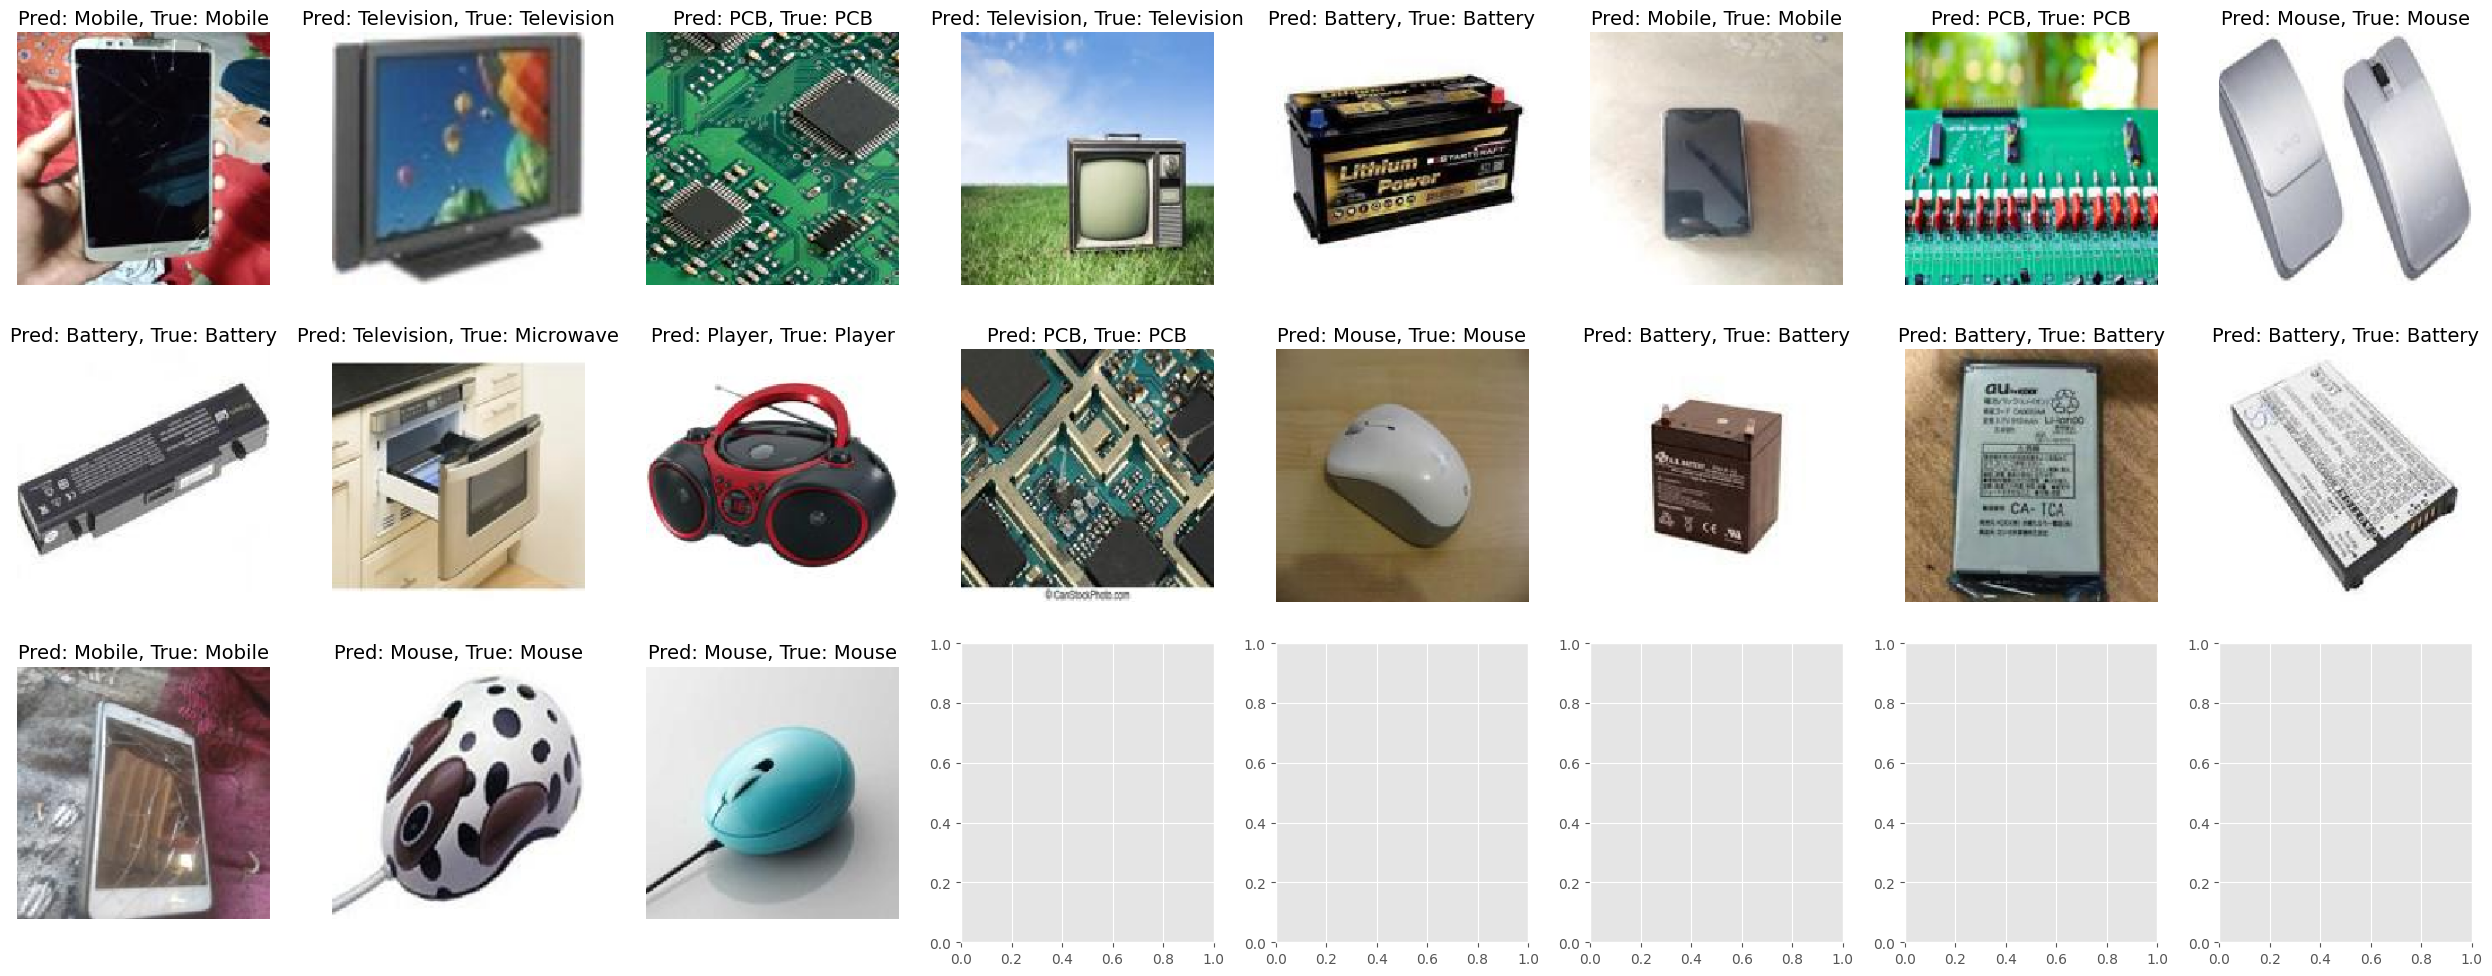

In [127]:
fig, axs = plt.subplots(3, 8, figsize=(25, 10))


axs = axs.flatten()

for ax,img , pred , true in zip(axs , images , predictedClasses , trueClasses):
    ax.imshow(img)
    ax.set_title(f"Pred: {pred}, True: {true}" ,fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [128]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(history, pickle_out)
pickle_out.close()